In [68]:
#What libraries are required for this project, and why are they useful in data analysis?
"""
The matplotlib is used mainly for plt.show() to show the data graphs(visulaization part) and for xtics, fontsize, figsize adjustment
The seaborn lib is used to use the barplot, scatterplot, heatmap etc..for data visualisation
pandas is mainly used to work with the dataset, to load the datset, to groupby the dataset and cleaning and transforming the dataset
"""

# NOTE : The key insights and findings are here : 
#   https://docs.google.com/document/d/13CtMe8wyb0Ye2Z1YHWt6Ql0gpFy4b53z/edit?usp=sharing&ouid=107857076080323012434&rtpof=true&sd=true

import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns


In [4]:
df = pd.read_csv("imdb_movies.csv")
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


In [7]:
#Use .info() to understand the data types and missing values. What potential issues can you spot?
#The issue is with the date_x column as its dtype is given as object
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10093 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10122 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 954.3+ KB


In [6]:
#Are there any columns where data types need conversion (e.g., date, ratings)? Explain your decision.
# Yes, date need to be converted into datetime as it is object initially for the column to extract new column like year.
df["date_x"] = pd.to_datetime(df["date_x"])

In [11]:
df.isnull().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

In [9]:
#Which columns contain missing values? How would you handle them?
# Genre and crew contains missing values, we will fill them with unavailable

df["genre"] = df["genre"].fillna("unavailable")

In [10]:
df["crew"] = df["crew"].fillna("unavailable")

In [12]:
df.describe()

,date_x,score,budget_x,revenue
count,10178,10178.000000,1.017800e+04,1.017800e+04
mean,2008-06-15 06:16:37.445470720,63.497052,6.488238e+07,2.531401e+08
min,1903-05-15 00:00:00,0.000000,1.000000e+00,0.000000e+00
25%,2001-12-25 06:00:00,59.000000,1.500000e+07,2.858898e+07
50%,2013-05-09 00:00:00,65.000000,5.000000e+07,1.529349e+08
75%,2019-10-17 00:00:00,71.000000,1.050000e+08,4.178021e+08
max,2023-12-31 00:00:00,100.000000,4.600000e+08,2.923706e+09
std,NaN,13.537012,5.707565e+07,2.777880e+08


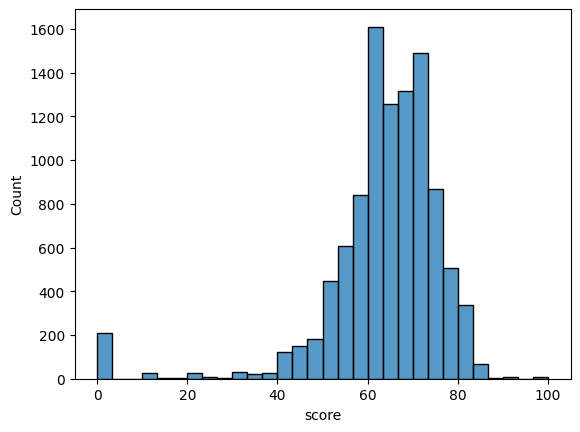

In [38]:
#What is the distribution of scores? Plot a histogram and describe its shape.

sns.histplot(data = df, x = "score",bins = 30)
plt.show()

In [19]:
# What are the most common genres in the dataset? Use a bar chart to show their distribution.

gb = df.groupby("genre").agg({"names" : "count"})
gb = gb.sort_values(by = "names", ascending = False)
gb = gb.head(20)


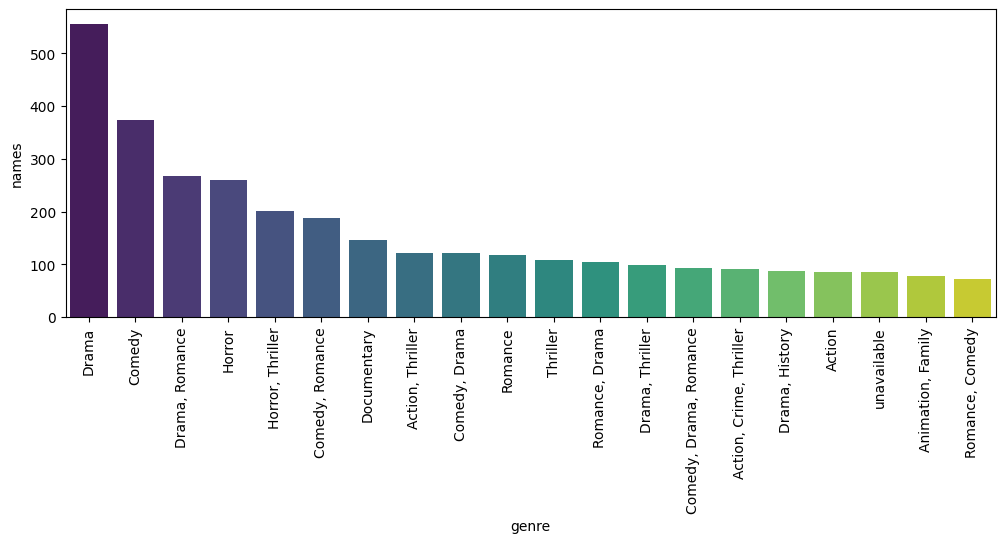

In [28]:
plt.figure(figsize = (12,4))
sns.barplot(x= gb.index, y = gb["names"], data = gb, hue = gb.index, palette = "viridis")   # for giving a palette, a hue is must
plt.xticks(rotation = 90)
plt.show()

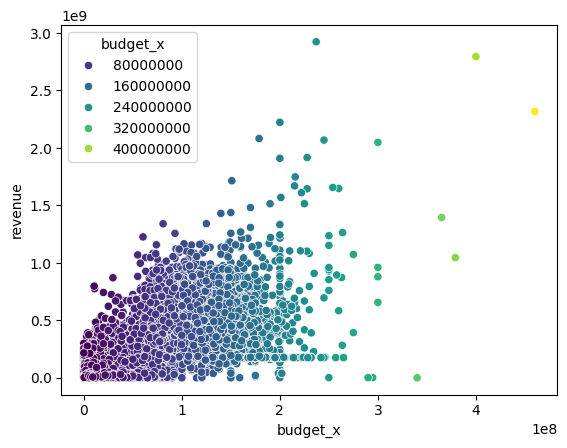

In [39]:
#Is there a relationship between a Budget and Revenue? Plot a scatter plot and describe any observed trend.

sns.scatterplot(x="budget_x", y = "revenue",data = df, hue = "budget_x", palette = "viridis")
plt.show()

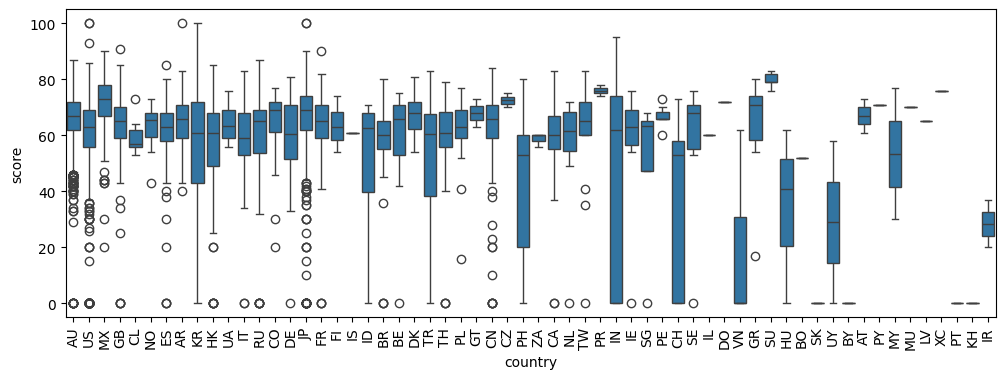

In [50]:
#How do score vary by country? Use a boxplot to visualize the differences in ratings across genres.

plt.figure(figsize = (12,4))
sns.boxplot(x="country",y="score",data=df)
plt.xticks(rotation=90)
plt.show()

In [40]:
#Is there a correlation between scores and budget and revenue of the movie? Create a scatter plot and calculate the correlation coefficient. What can you conclude?

df1 = df[["score","budget_x","revenue"]]
data = df1.corr()

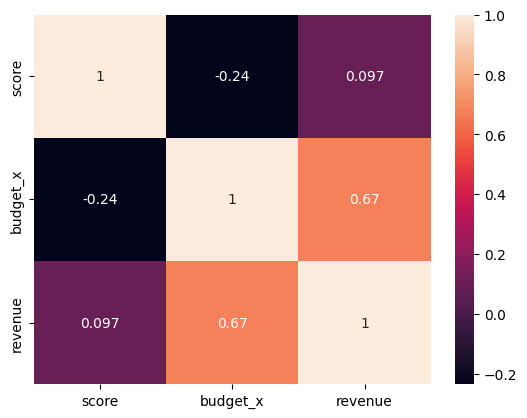

In [56]:
sns.heatmap(data, annot = True)
plt.show()

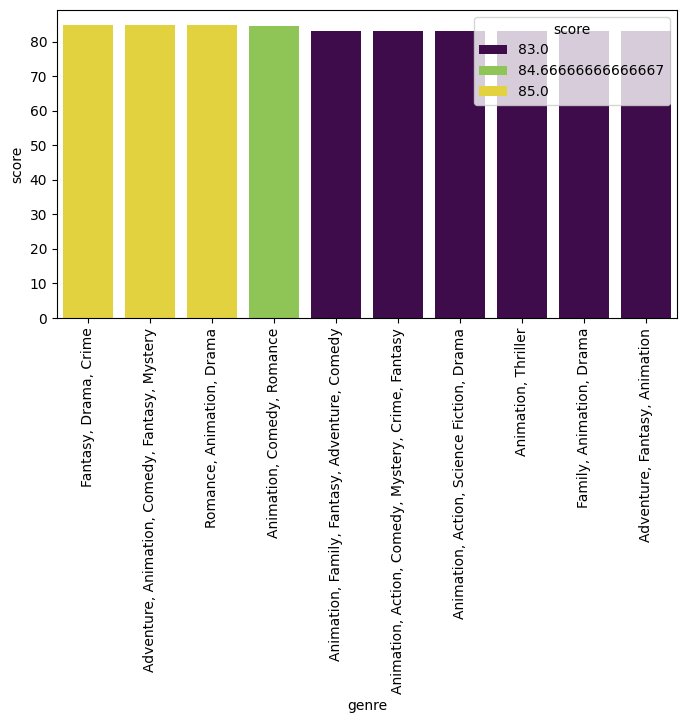

In [45]:
#Which genre has the highest average rating? Calculate the average rating for each genre and plot the results.
gb = df.groupby("genre").agg({"score":"mean"})
gb = gb.sort_values(by = "score", ascending = False)
gb= gb.head(10)

plt.figure(figsize=(8,4))
sns.barplot(data = gb, x = gb.index, y = gb["score"], hue = "score", palette = "viridis")
plt.xticks(rotation = 90)
plt.show()


In [46]:
df["year"] = df["date_x"].dt.strftime("%Y")
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,year
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US,2016
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US,1990
10175,The Russia House,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US,1990
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US,1995


In [49]:
df["year"] = df["year"].astype("int")


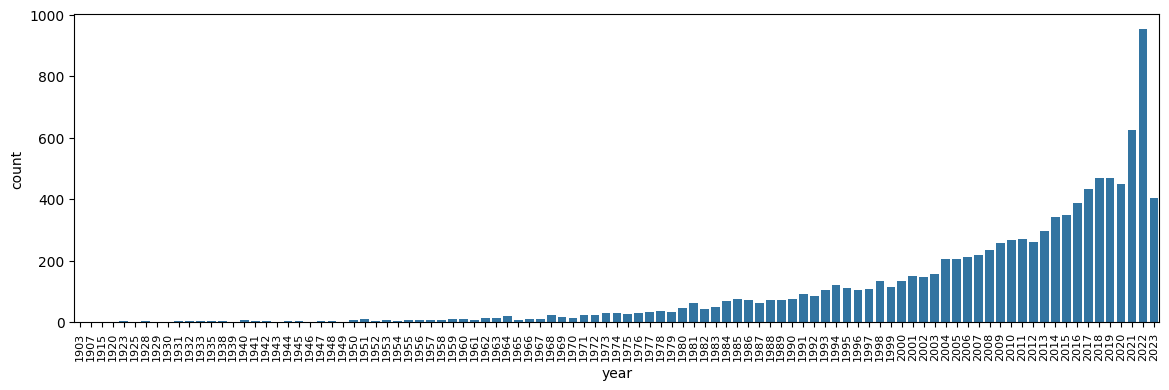

In [63]:


plt.figure(figsize = (14,4))
sns.countplot(x="year", data = df)
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

In [54]:
#How does the popularity of genres vary over time? Plot the number of movies released per genre each year.


gb = df.groupby(["year","genre"]).agg({"date_x":"count"})
gb    # For plotting we are not giving hue of genres as that would be very huge.(2300 genres are there)

date_x
year genre                                 
1903 Drama, History                       1
1907 Adventure, Science Fiction           1
1915 Drama, History, War                  2
1920 Drama, Horror, Thriller, Crime       1
1923 Comedy, Romance, Thriller            1
...                                     ...
2023 War, Drama, History                  1
     War, History, Drama                  1
     Western                              1
     Western, Action                      1
     unavailable                         24

[6438 rows x 1 columns]

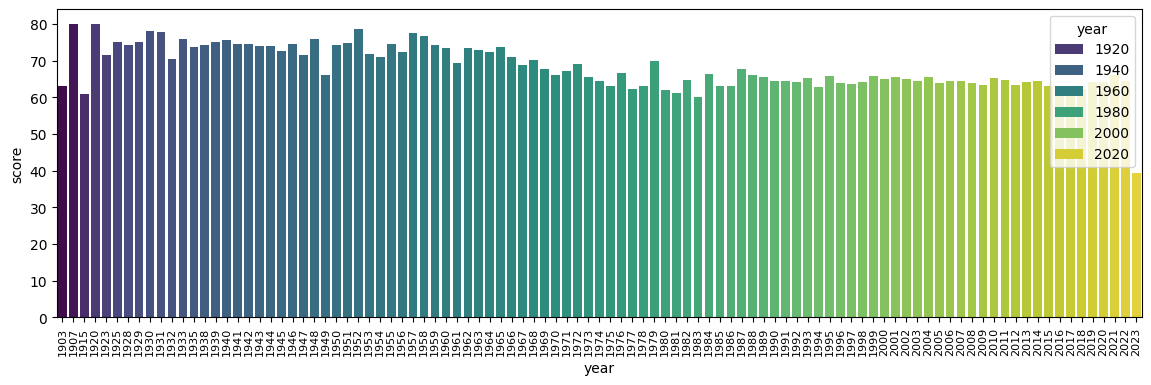

In [100]:
# How has the average movie rating changed over the years? Plot the average rating for each year.

gb = df.groupby("year").agg({"score" : "mean"})
gb
plt.figure(figsize = (14,4))
sns.barplot(y="score", x = gb.index, data = gb, hue = "year",palette = "viridis")
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

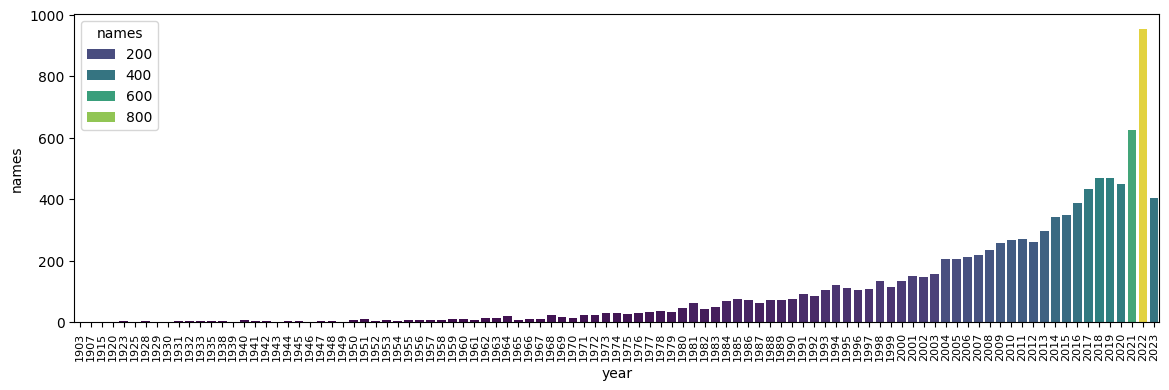

In [81]:
#Which years had the highest and lowest number of movie releases? Plot the number of movies released each year.

gb = df.groupby("year").agg({"names" : "count"})
gb = gb.sort_values(by = "names", ascending = False)
plt.figure(figsize = (14,4))
sns.barplot(y="names", x = gb.index, data = gb, hue = "names",palette = "viridis")
plt.xticks(rotation = 90, fontsize = 8)
plt.show()


In [82]:


df["decade"] = (df["date_x"].dt.year //10)* 10


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,year,decade
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023,2020
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022,2020
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023,2020
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023,2020
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US,2016,2010
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US,1990,1990
10175,The Russia House,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US,1990,1990
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US,1995,1990


In [116]:
# Which genres are most popular in each decade? Create a bar plot showing the most frequent genres by decade.

gb = df.groupby(["decade", "genre"]).agg({"names":"count"}).reset_index() # for handling the index to use in barplot as there are 3 columns inseat of 2.
gb = gb.sort_values(by = "decade", ascending = False)
gb


,decade,genre,names
3882,2020,unavailable,32
3380,2020,"Animation, Fantasy, Horror, Action, Mystery",1
3389,2020,"Animation, Romance, Comedy, Drama, Fantasy",1
3388,2020,"Animation, Mystery, Drama, Horror, Adventure",1
3387,2020,"Animation, Mystery, Action, Crime",2
...,...,...,...
4,1920,"Comedy, Romance, Thriller",1
3,1920,"Adventure, Drama, Romance",1
2,1910,"Drama, History, War",2
1,1900,"Drama, History",1


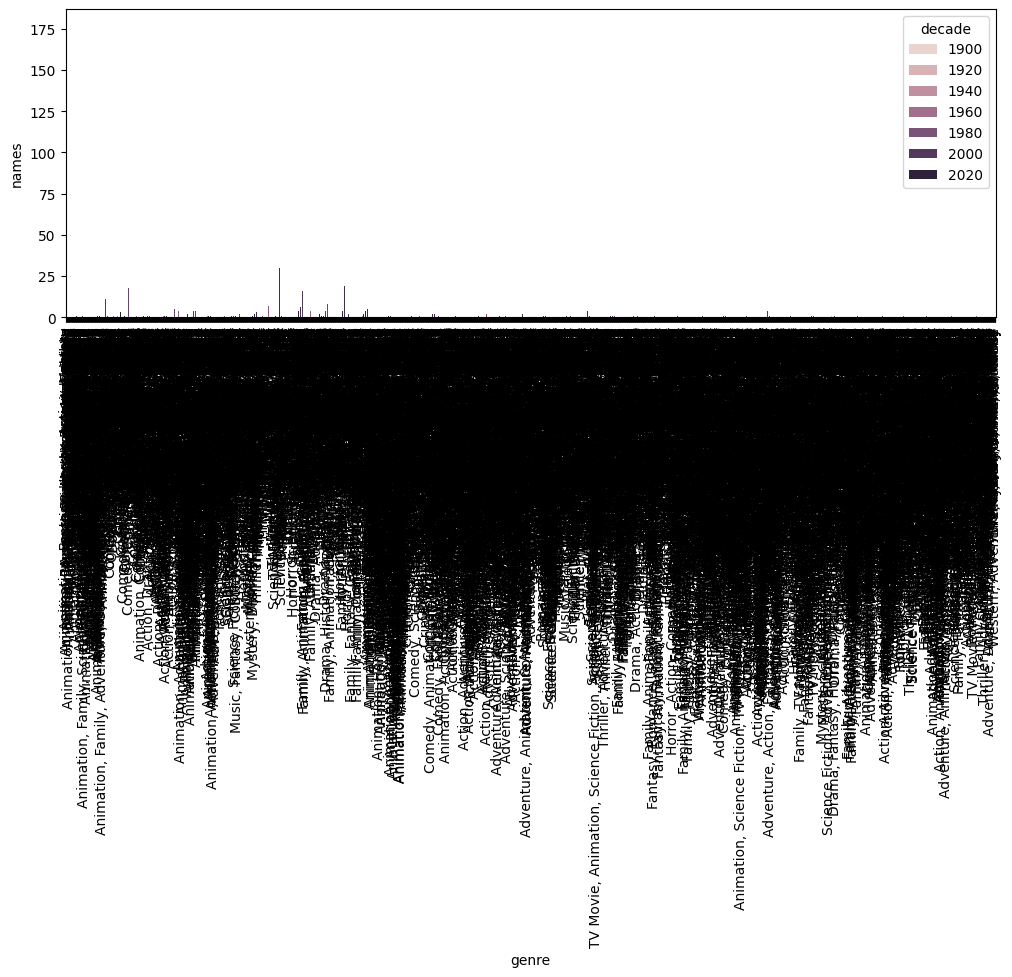

In [113]:
plt.figure(figsize = (12,4))
sns.barplot(x= "genre", y = "names",hue = "decade",data = gb)  # since the genres are 2300 it's difficult to plot and understand.
plt.xticks(rotation = 90)
plt.show()

In [117]:
# Are there specific genres or release years with higher-rated movies? Group by genre and year, then analyze the average rating.

gb = df.groupby(["year","genre"]).agg({"score":"mean"}).reset_index()
gb = gb.sort_values(by = "year", ascending = False)
gb

,year,genre,score
6437,2023,unavailable,0.0
6324,2023,"Comedy, Drama, Fantasy",63.0
6322,2023,"Comedy, Drama",46.5
6321,2023,"Comedy, Animation, Family, Action, Adventure",0.0
6320,2023,"Comedy, Animation",0.0
...,...,...,...
5,1923,Drama,68.0
3,1920,"Drama, Horror, Thriller, Crime",80.0
2,1915,"Drama, History, War",61.0
1,1907,"Adventure, Science Fiction",80.0


In [ ]:
"""
Comprehensive Summary of Dataset Analysis:

1. Dataset Overview
The dataset contains information about movies, including genres, ratings, budget, revenue, and release years.
Rows represent individual movies and columns describe their attributes.

Insights:
Missing values were present in budget, revenue, and ratings columns.
Data types required conversion such as dates.

2. Data Cleaning : 
Dates were converted to a proper format.

3. Univariate Analysis :
Scores: Ratings followed a slightly skewed distribution with most movies receiving moderate scores.
Genres: Drama, Action, and Comedy were the most frequently occurring genres.
Insights:
Most movies have ratings in the 6-8 range.
Popular genres reflect a balance between mainstream and critically acclaimed films.
4. Bivariate Analysis
Budget vs. Revenue:
A positive correlation (moderate to strong) exists between budget and revenue. Larger budgets often yield higher revenues.
Ratings vs. Country:
Average ratings vary by country, with some regions consistently producing higher-rated movies.
Correlation Coefficient:
Budget and revenue had a stronger correlation compared to ratings and revenue, showing that budget size is more predictive of revenue than ratings.
Insights:
Budget is a significant driver of revenue, but high revenue doesn’t necessarily mean high ratings.
5. Genre-Specific Analysis
Highest Average Rating:
Documentaries and Dramas had the highest average ratings, reflecting critical appreciation.
Popularity Over Time:
Genres like Action and Adventure have gained popularity over time, while traditional genres such as Westerns have declined.
Insights:
Audience preferences have shifted towards more visually engaging genres, such as Action and Adventure.
6. Year and Trend Analysis
Ratings Over Time:
Average ratings have remained stable, suggesting consistent quality over decades.
Movie Releases:
The number of releases has increased significantly since the 2000s, showing the growth of the film industry.
Insights:
Technological advancements and broader accessibility have led to a surge in movie production.
7. Multivariate Analysis
Genres by Decade:
Specific genres like Action and Sci-Fi became dominant in the 21st century, reflecting technological and storytelling advancements.
High-Rated Movies:
Genres like Documentary and Drama had higher ratings, while Action movies often prioritize spectacle over ratings.
Insights:
Audience tastes evolve with time, and certain genres thrive in specific decades due to cultural and industry trends.
Final Insights from the Analysis:
Budget is a Key Driver of Revenue: Movies with higher budgets tend to generate higher revenues, showcasing the importance of investment in production.
Stable Ratings Over Time: Despite the industry's growth, average ratings have remained stable, indicating consistent quality.
Genre Evolution: Action and Adventure have become dominant, but critically acclaimed genres like Documentary and Drama still shine in ratings.
Increasing Movie Releases: A dramatic increase in the number of movie releases, especially after 2000, highlights industry expansion.
Shift in Genre Popularity Over Decades: Genres have shifted with societal preferences, technological advances, and storytelling trends.
"""